# 利用数组进行数据处理

NumPy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。

**用数组表达式代替循环的做法，通常被称为矢量化。**

矢量化数组运算要比等价的纯Python方式快上一两个数量级

(1000,)
[[-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 ..., 
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]]
[[-5.   -5.   -5.   ..., -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ..., -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ..., -4.98 -4.98 -4.98]
 ..., 
 [ 4.97  4.97  4.97 ...,  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...,  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...,  4.99  4.99  4.99]]
[[ 7.07106781  7.06400028  7.05693985 ...,  7.04988652  7.05693985
   7.06400028]
 [ 7.06400028  7.05692568  7.04985815 ...,  7.04279774  7.04985815
   7.05692568]
 [ 7.05693985  7.04985815  7.04278354 ...,  7.03571603  7.04278354
   7.04985815]
 ..., 
 [ 7.04988652  7.04279774  7.03571603 ...,  7.0286414   7.03571603
   7.04279774]
 [ 7.05693985  7.04985815  7.04278354 ...,  7.03571603  7.04278354
   7.04985815]
 [ 7.06400028  7.05692568  7.04

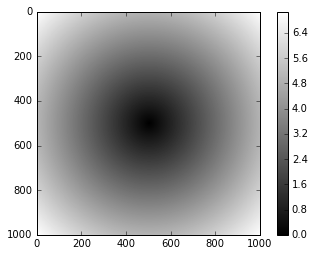

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

%matplotlib inline

points = np.arange(-5, 5, 0.01)
print(points.shape)
xs, ys = np.meshgrid(points, points) # xs,ys互为转置矩阵
print(xs)
print(ys)

z = np.sqrt(xs ** 2 + ys ** 2)
print(z)

plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
pylab.show()

## 1 numpy.where与列表推导

### 通过真值表选择元素

In [4]:
import numpy.random as np_random

'''
关于zip函数的一点解释，zip可以接受任意多参数，然后重新组合成1个tuple列表。
zip([1, 2, 3], [4, 5, 6], [7, 8, 9])
返回结果：[(1, 4, 7), (2, 5, 8), (3, 6, 9)]
'''
x_arr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y_arr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result = [(x if c else y) for x, y, c in zip(x_arr, y_arr, cond)] #通过列表推导实现
print(result)
print(np.where(cond, x_arr, y_arr)) #使用NumPy的where函数

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]
[ 1.1  2.2  1.3  1.4  2.5]


### 更多where的例子

In [5]:
arr = np_random.randn(4, 4)
print(arr)
print(np.where(arr > 0, 2, -2))
print(np.where(arr > 0, 2, arr))

[[ 1.05928189 -0.27376963  1.06130172  0.42273141]
 [-0.82918045 -0.74254052 -1.44580587  0.64511942]
 [-0.78302217  0.13073776  0.70065122  0.29592315]
 [-0.48800042  0.64468457 -2.2037462   0.21877382]]
[[ 2 -2  2  2]
 [-2 -2 -2  2]
 [-2  2  2  2]
 [-2  2 -2  2]]
[[ 2.         -0.27376963  2.          2.        ]
 [-0.82918045 -0.74254052 -1.44580587  2.        ]
 [-0.78302217  2.          2.          2.        ]
 [-0.48800042  2.         -2.2037462   2.        ]]


### where嵌套

In [8]:
cond_1 = np.array([True, False, True, True, False])
cond_2 = np.array([False, True, False, True, False])

# 传统代码如下
result = []
for i in range(len(cond_1)):
    if cond_1[i] and cond_2[i]:
        result.append(0)
    elif cond_1[i]:
        result.append(1)
    elif cond_2[i]:
        result.append(2)
    else:
        result.append(3)
print(result)

# np.where实现
result = np.where(cond_1 & cond_2, 0, np.where(cond_1, 1, np.where(cond_2, 2, 3)))
print(result)

[1, 2, 1, 0, 3]
[1 2 1 0 3]


## 2 数学和统计方法

- `sum` 对数组中全部或某轴向的元素求和，零长度的数组的sum为0
- `mean` 算数平均数。零长度的数组的mean为NaN
- `std`,`var` 标准差和方差，自由度可调（默认为n）
- `min`, `max` 最小值、最大值
- `argmin`, `argmax` 最小值和最大值的索引
- `cumsum` 所有元素的累计和
- `cumprod` 所有元素的累计积

In [9]:
arr = np_random.randn(5, 4)
print(arr)
print(arr.mean())
print(arr.sum())
print(arr.mean(axis=1)) # 对每一行的元素求平均
print(arr.sum(0)) # 对每一列元素求和，axis可以省略

[[-0.34615362  0.04716783 -0.0268702  -0.62468002]
 [ 0.48476761  0.55157618  0.01399086  1.07869027]
 [ 0.76508267 -0.46575716  0.12261686  0.08336009]
 [-0.22052255 -0.54400122  1.2041668   1.36511926]
 [-0.07406488  0.29523003  0.2899758  -0.50621092]]
0.174674185152
3.49348370304
[-0.237634    0.53225623  0.12632562  0.45119057  0.00123251]
[ 0.60910923 -0.11578434  1.60388012  1.39627869]


In [13]:
'''
cumsum:
- 按列操作：a[i][j] += a[i - 1][j]
- 按行操作：a[i][j] += a[i][j - 1]
cumprod:
- 按列操作：a[i][j] *= a[i - 1][j]
- 按行操作：a[i][j] *= a[i][j - 1]
'''
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr.cumsum(0))
print(arr.cumsum(1))
print(arr.cumprod(1))

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


## 3 用于布尔型数组的方法

In [19]:
# sum方法可用于对True的值求和
arr = np_random.randn(100)
print((arr > 0).sum())

49


In [20]:
bools = np.array([False, False, True, False])
print(bools.any()) # 有一个为True则返回True
print(bools.all()) # 有一个为False则返回Fasle

True
False


## 4 排序

In [22]:
arr = np_random.randn(8)
arr.sort()
print(arr)

[-1.62094812  0.13833623  0.25068432  0.32077066  0.37219267  0.76590899
  1.74735652  1.7473705 ]


In [25]:
# 二维数组排序
arr = np_random.randn(5, 3)
print(arr)
arr.sort(1) # 对每一行元素做排序
print(arr)

[[ 1.26844468 -1.85416959  0.57290924]
 [ 1.51149966 -0.2085402  -1.25923731]
 [ 1.10142082 -0.24663852 -0.87046472]
 [ 1.29722086  1.07958825  0.90108216]
 [-1.50479089 -0.75102328  0.36179587]]
[[-1.85416959  0.57290924  1.26844468]
 [-1.25923731 -0.2085402   1.51149966]
 [-0.87046472 -0.24663852  1.10142082]
 [ 0.90108216  1.07958825  1.29722086]
 [-1.50479089 -0.75102328  0.36179587]]


In [26]:
# 找位置在5%的数字
large_arr = np_random.randn(1000)
large_arr.sort()
print(large_arr[int(0.05 * len(large_arr))])

-1.60947474053


## 5 去重及其他集合运算

- `unique(x)` 计算x中的唯一元素，并返回有序结果
- `intersect1d(x, y)` 计算x和y中的公共元素，并返回有序结果
- `union1d(x, y)` 计算x和y的并集，并返回有序结果
- `in1d(x, y)` 得到一个表述【x的元素是否包含于y】的布尔型数组
- `setdiff1d(x, y)` 集合的差，即元素在x中且不在y中
- `setxor1d(x, y)` 集合的异或，即存在于一个数组中但不同时存在于两个数组中的元素

In [32]:
# 用unique函数去重
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(sorted(set(names))) # 传统Python做法
print(np.unique(names))
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
print(np.unique(ints))

['Bob', 'Joe', 'Will']
['Bob' 'Joe' 'Will']
[1 2 3 4]


In [31]:
# 查找数组元素是否在另一数组
values = np.array([6, 0, 0, 3, 2, 5, 6])
print(np.in1d(values, [2, 3, 6]))

[ True False False  True  True False  True]
